In [1]:
import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.utils.data import TensorDataset
from torch.autograd import Variable
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import torch.nn.functional as F

In [3]:
train_dataset = dsets.MNIST(root ='./data',train = True,transform = transforms.ToTensor(),download = True)
test_dataset = dsets.MNIST(root ='./data',train = False,transform = transforms.ToTensor())
train_loader = torch.utils.data.DataLoader(dataset = train_dataset,batch_size = batch_size,shuffle = True)
test_loader = torch.utils.data.DataLoader(dataset = test_dataset,batch_size = batch_size,shuffle = True)

In [2]:
def color(x,color):
    a = torch.zeros(x.size()[0],28,28,3,dtype=torch.float32)
    for i in range(a.size()[0]):
        for j in range(a.size()[1]):
            for k in range(a.size()[2]):
                if(color =="red"):
                    a[i][j][k] = torch.tensor([x[i][j][k].item()/255,0,0],dtype=torch.float32)
                if(color =="green"):
                    a[i][j][k] = torch.tensor([0,x[i][j][k].item()/255,0],dtype=torch.float32)
                if(color =="blue"):
                    a[i][j][k] = torch.tensor([0,0,x[i][j][k].item()/255],dtype=torch.float32)
                if(color =="yellow"):
                    a[i][j][k] = torch.tensor([x[i][j][k].item()/255,x[i][j][k].item()/255,0],dtype=torch.float32)
                if(color =="white"):
                    a[i][j][k] = torch.tensor([x[i][j][k].item()/255,x[i][j][k].item()/255,x[i][j][k].item()/255],dtype=torch.float32)
    return a

In [3]:
#red_train = color(train_dataset.data[:],"red")
#green_train = color(train_dataset.data[:],"green")
#blue_train = color(train_dataset.data[:],"blue")
#yellow_train = color(train_dataset.data[:],"yellow")
#white_train = color(train_dataset.data[:],"white")
#torch.save(red_train,"red_train.pt")
#torch.save(green_train,"green_train.pt")
#torch.save(blue_train,"blue_train.pt")
#torch.save(yellow_train,"yellow_train.pt")
#torch.save(white_train,"white_train.pt")
#l = train_dataset.targets[:]
#labels_train = torch.cat((l,l,l,l,l),0)
#torch.save(labels_train,"labels_train.pt")
red_train = torch.load("red_train.pt")
green_train = torch.load("green_train.pt")
blue_train = torch.load("blue_train.pt")
yellow_train = torch.load("yellow_train.pt")
white_train = torch.load("white_train.pt")
labels_train=torch.load("labels_train.pt")


In [4]:
batch_size = 100

In [5]:
train_data = TensorDataset(torch.cat((red_train,green_train,blue_train,yellow_train,white_train),0),labels_train)
train_load = torch.utils.data.DataLoader(dataset = train_data,batch_size = batch_size,shuffle = True)

In [6]:
#red_test = color(test_dataset.data[:],"red")
#green_test = color(test_dataset.data[:],"green")
#blue_test = color(test_dataset.data[:],"blue")
#yellow_test = color(test_dataset.data[:],"yellow")
#white_test = color(test_dataset.data[:],"white")
#torch.save(red_test,"red_test.pt")
#torch.save(green_test,"green_test.pt")
#torch.save(blue_test,"blue_test.pt")
#torch.save(yellow_test,"yellow_test.pt")
#torch.save(white_test,"white_test.pt")
#l = test_dataset.targets[:]
#labels_test = torch.cat((l,l,l,l,l),0)
#torch.save(labels_test,"labels_test.pt")
red_test = torch.load("red_test.pt")
green_test = torch.load("green_test.pt")
blue_test = torch.load("blue_test.pt")
yellow_test = torch.load("yellow_test.pt")
white_test = torch.load("white_test.pt")
labels_test=torch.load("labels_test.pt")

In [7]:
test_data = TensorDataset(torch.cat((red_test,green_test,blue_test,yellow_test,white_test),0),labels_test)
test_load = torch.utils.data.DataLoader(dataset = test_data,batch_size = batch_size,shuffle = False)

In [8]:
input_size = 28*28*3
num_classes = 10
num_epochs = 100
learning_rate = 0.001

In [9]:
class Model(nn.Module):
    def __init__(self, in_features=28*28*3, h1=8, h2=8, out_features=10):
        super().__init__()
        self.fc1 = nn.Linear(in_features,h1)    # input layer
        self.fc2 = nn.Linear(h1, h2)            # hidden layer
        self.out = nn.Linear(h2, out_features)  # output layer
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x
model = Model()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate,weight_decay=0.003)
criterion = nn.CrossEntropyLoss()

In [10]:
train_loss=[]
test_acc=[]
val_loss=[]
for epoch in range(num_epochs):

    for i, (images, labels) in enumerate(train_load):
        images = Variable(images.view(-1, 28 * 28*3))
        labels = Variable(labels)

        # Forward + Backward + Optimize
        outputs = model(images)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        #accuracy = 100 * correct.item() / labels.size(0)
        if (i + 1) % 50 == 0: 
            train_loss.append(loss.item())
            with torch.no_grad():
                correct=0
                total = 0
                l=0
                for images, labels in test_load:
                    images = Variable(images.view(-1, 28 * 28*3))
                    outputs = model(images)
                    l+= criterion(outputs, labels).item()
                    for j in range(outputs.size()[0]):
                        total+=1
                        if (outputs[j].argmax().item() ==labels[j]): correct+=1
            test_err=(correct / total)
            test_acc.append(test_err)
            val_loss.append(l/total*100)
        if (i + 1) % 100 == 0: 
            print('Epoch: [% d/% d],  Loss: %.4f, Accuracy:%.2f' % (epoch + 1, num_epochs, loss.item(), test_err))

Epoch: [ 1/ 100],  Loss: 1.7885, Accuracy:0.40
Epoch: [ 1/ 100],  Loss: 1.1313, Accuracy:0.70
Epoch: [ 1/ 100],  Loss: 0.8676, Accuracy:0.79
Epoch: [ 1/ 100],  Loss: 0.6227, Accuracy:0.82
Epoch: [ 1/ 100],  Loss: 0.6317, Accuracy:0.84
Epoch: [ 1/ 100],  Loss: 0.6937, Accuracy:0.85
Epoch: [ 1/ 100],  Loss: 0.5496, Accuracy:0.86
Epoch: [ 1/ 100],  Loss: 0.4216, Accuracy:0.86
Epoch: [ 1/ 100],  Loss: 0.4142, Accuracy:0.87
Epoch: [ 1/ 100],  Loss: 0.4869, Accuracy:0.88
Epoch: [ 1/ 100],  Loss: 0.4625, Accuracy:0.88
Epoch: [ 1/ 100],  Loss: 0.4584, Accuracy:0.88
Epoch: [ 1/ 100],  Loss: 0.3965, Accuracy:0.88
Epoch: [ 1/ 100],  Loss: 0.6581, Accuracy:0.88
Epoch: [ 1/ 100],  Loss: 0.3600, Accuracy:0.88
Epoch: [ 1/ 100],  Loss: 0.5678, Accuracy:0.88
Epoch: [ 1/ 100],  Loss: 0.5035, Accuracy:0.89
Epoch: [ 1/ 100],  Loss: 0.3100, Accuracy:0.89
Epoch: [ 1/ 100],  Loss: 0.2442, Accuracy:0.89
Epoch: [ 1/ 100],  Loss: 0.4000, Accuracy:0.89
Epoch: [ 1/ 100],  Loss: 0.4317, Accuracy:0.89
Epoch: [ 1/ 1

Epoch: [ 6/ 100],  Loss: 0.4443, Accuracy:0.92
Epoch: [ 6/ 100],  Loss: 0.1934, Accuracy:0.92
Epoch: [ 6/ 100],  Loss: 0.3985, Accuracy:0.92
Epoch: [ 6/ 100],  Loss: 0.3809, Accuracy:0.91
Epoch: [ 6/ 100],  Loss: 0.3326, Accuracy:0.92
Epoch: [ 7/ 100],  Loss: 0.2830, Accuracy:0.92
Epoch: [ 7/ 100],  Loss: 0.2210, Accuracy:0.92
Epoch: [ 7/ 100],  Loss: 0.4683, Accuracy:0.92
Epoch: [ 7/ 100],  Loss: 0.2431, Accuracy:0.92
Epoch: [ 7/ 100],  Loss: 0.3612, Accuracy:0.92
Epoch: [ 7/ 100],  Loss: 0.3332, Accuracy:0.92
Epoch: [ 7/ 100],  Loss: 0.3891, Accuracy:0.92
Epoch: [ 7/ 100],  Loss: 0.5500, Accuracy:0.92
Epoch: [ 7/ 100],  Loss: 0.4867, Accuracy:0.92
Epoch: [ 7/ 100],  Loss: 0.3368, Accuracy:0.92
Epoch: [ 7/ 100],  Loss: 0.2996, Accuracy:0.92
Epoch: [ 7/ 100],  Loss: 0.3402, Accuracy:0.92
Epoch: [ 7/ 100],  Loss: 0.3174, Accuracy:0.92
Epoch: [ 7/ 100],  Loss: 0.2857, Accuracy:0.92
Epoch: [ 7/ 100],  Loss: 0.2543, Accuracy:0.92
Epoch: [ 7/ 100],  Loss: 0.3955, Accuracy:0.92
Epoch: [ 7/ 1

Epoch: [ 12/ 100],  Loss: 0.2029, Accuracy:0.92
Epoch: [ 12/ 100],  Loss: 0.3356, Accuracy:0.92
Epoch: [ 12/ 100],  Loss: 0.3885, Accuracy:0.92
Epoch: [ 12/ 100],  Loss: 0.2684, Accuracy:0.92
Epoch: [ 12/ 100],  Loss: 0.1514, Accuracy:0.92
Epoch: [ 12/ 100],  Loss: 0.2883, Accuracy:0.92
Epoch: [ 12/ 100],  Loss: 0.3706, Accuracy:0.92
Epoch: [ 12/ 100],  Loss: 0.1557, Accuracy:0.92
Epoch: [ 12/ 100],  Loss: 0.5589, Accuracy:0.92
Epoch: [ 12/ 100],  Loss: 0.3419, Accuracy:0.92
Epoch: [ 12/ 100],  Loss: 0.1685, Accuracy:0.91
Epoch: [ 12/ 100],  Loss: 0.3246, Accuracy:0.92
Epoch: [ 13/ 100],  Loss: 0.2905, Accuracy:0.92
Epoch: [ 13/ 100],  Loss: 0.2577, Accuracy:0.92
Epoch: [ 13/ 100],  Loss: 0.2068, Accuracy:0.92
Epoch: [ 13/ 100],  Loss: 0.3256, Accuracy:0.92
Epoch: [ 13/ 100],  Loss: 0.2233, Accuracy:0.92
Epoch: [ 13/ 100],  Loss: 0.3256, Accuracy:0.92
Epoch: [ 13/ 100],  Loss: 0.4925, Accuracy:0.92
Epoch: [ 13/ 100],  Loss: 0.2459, Accuracy:0.92
Epoch: [ 13/ 100],  Loss: 0.2330, Accura

Epoch: [ 18/ 100],  Loss: 0.2544, Accuracy:0.92
Epoch: [ 18/ 100],  Loss: 0.3047, Accuracy:0.92
Epoch: [ 18/ 100],  Loss: 0.2421, Accuracy:0.92
Epoch: [ 18/ 100],  Loss: 0.1422, Accuracy:0.92
Epoch: [ 18/ 100],  Loss: 0.2920, Accuracy:0.92
Epoch: [ 18/ 100],  Loss: 0.3375, Accuracy:0.92
Epoch: [ 18/ 100],  Loss: 0.2913, Accuracy:0.92
Epoch: [ 18/ 100],  Loss: 0.3477, Accuracy:0.92
Epoch: [ 18/ 100],  Loss: 0.3282, Accuracy:0.92
Epoch: [ 18/ 100],  Loss: 0.2559, Accuracy:0.92
Epoch: [ 18/ 100],  Loss: 0.4153, Accuracy:0.92
Epoch: [ 18/ 100],  Loss: 0.3041, Accuracy:0.92
Epoch: [ 18/ 100],  Loss: 0.2053, Accuracy:0.92
Epoch: [ 18/ 100],  Loss: 0.2804, Accuracy:0.92
Epoch: [ 18/ 100],  Loss: 0.3346, Accuracy:0.92
Epoch: [ 18/ 100],  Loss: 0.3287, Accuracy:0.92
Epoch: [ 18/ 100],  Loss: 0.3654, Accuracy:0.92
Epoch: [ 18/ 100],  Loss: 0.3346, Accuracy:0.92
Epoch: [ 18/ 100],  Loss: 0.5153, Accuracy:0.92
Epoch: [ 18/ 100],  Loss: 0.3305, Accuracy:0.92
Epoch: [ 18/ 100],  Loss: 0.4148, Accura

Epoch: [ 24/ 100],  Loss: 0.3313, Accuracy:0.92
Epoch: [ 24/ 100],  Loss: 0.1785, Accuracy:0.92
Epoch: [ 24/ 100],  Loss: 0.1670, Accuracy:0.92
Epoch: [ 24/ 100],  Loss: 0.2583, Accuracy:0.92
Epoch: [ 24/ 100],  Loss: 0.4991, Accuracy:0.92
Epoch: [ 24/ 100],  Loss: 0.2695, Accuracy:0.92
Epoch: [ 24/ 100],  Loss: 0.2338, Accuracy:0.92
Epoch: [ 24/ 100],  Loss: 0.2571, Accuracy:0.92
Epoch: [ 24/ 100],  Loss: 0.1520, Accuracy:0.92
Epoch: [ 24/ 100],  Loss: 0.3401, Accuracy:0.92
Epoch: [ 24/ 100],  Loss: 0.2303, Accuracy:0.92
Epoch: [ 24/ 100],  Loss: 0.2315, Accuracy:0.92
Epoch: [ 24/ 100],  Loss: 0.2330, Accuracy:0.92
Epoch: [ 24/ 100],  Loss: 0.3898, Accuracy:0.92
Epoch: [ 24/ 100],  Loss: 0.4025, Accuracy:0.92
Epoch: [ 24/ 100],  Loss: 0.3093, Accuracy:0.92
Epoch: [ 24/ 100],  Loss: 0.2581, Accuracy:0.92
Epoch: [ 24/ 100],  Loss: 0.2499, Accuracy:0.92
Epoch: [ 24/ 100],  Loss: 0.3346, Accuracy:0.92
Epoch: [ 24/ 100],  Loss: 0.2101, Accuracy:0.92
Epoch: [ 24/ 100],  Loss: 0.2294, Accura

Epoch: [ 29/ 100],  Loss: 0.1738, Accuracy:0.92
Epoch: [ 29/ 100],  Loss: 0.4830, Accuracy:0.92
Epoch: [ 29/ 100],  Loss: 0.3441, Accuracy:0.92
Epoch: [ 29/ 100],  Loss: 0.2520, Accuracy:0.92
Epoch: [ 29/ 100],  Loss: 0.2243, Accuracy:0.92
Epoch: [ 29/ 100],  Loss: 0.2631, Accuracy:0.92
Epoch: [ 29/ 100],  Loss: 0.2933, Accuracy:0.92
Epoch: [ 29/ 100],  Loss: 0.2594, Accuracy:0.92
Epoch: [ 29/ 100],  Loss: 0.3218, Accuracy:0.92
Epoch: [ 30/ 100],  Loss: 0.2454, Accuracy:0.92
Epoch: [ 30/ 100],  Loss: 0.3661, Accuracy:0.92
Epoch: [ 30/ 100],  Loss: 0.3177, Accuracy:0.93
Epoch: [ 30/ 100],  Loss: 0.4219, Accuracy:0.92
Epoch: [ 30/ 100],  Loss: 0.3524, Accuracy:0.92
Epoch: [ 30/ 100],  Loss: 0.2096, Accuracy:0.92
Epoch: [ 30/ 100],  Loss: 0.2557, Accuracy:0.92
Epoch: [ 30/ 100],  Loss: 0.3397, Accuracy:0.92
Epoch: [ 30/ 100],  Loss: 0.3798, Accuracy:0.92
Epoch: [ 30/ 100],  Loss: 0.1974, Accuracy:0.92
Epoch: [ 30/ 100],  Loss: 0.2195, Accuracy:0.93
Epoch: [ 30/ 100],  Loss: 0.3814, Accura

Epoch: [ 35/ 100],  Loss: 0.4389, Accuracy:0.92
Epoch: [ 35/ 100],  Loss: 0.2476, Accuracy:0.92
Epoch: [ 35/ 100],  Loss: 0.3592, Accuracy:0.92
Epoch: [ 35/ 100],  Loss: 0.1692, Accuracy:0.92
Epoch: [ 35/ 100],  Loss: 0.1975, Accuracy:0.92
Epoch: [ 35/ 100],  Loss: 0.2483, Accuracy:0.92
Epoch: [ 35/ 100],  Loss: 0.2950, Accuracy:0.93
Epoch: [ 35/ 100],  Loss: 0.3438, Accuracy:0.93
Epoch: [ 35/ 100],  Loss: 0.4207, Accuracy:0.93
Epoch: [ 35/ 100],  Loss: 0.3038, Accuracy:0.93
Epoch: [ 35/ 100],  Loss: 0.2932, Accuracy:0.92
Epoch: [ 35/ 100],  Loss: 0.4572, Accuracy:0.92
Epoch: [ 35/ 100],  Loss: 0.3408, Accuracy:0.92
Epoch: [ 35/ 100],  Loss: 0.3345, Accuracy:0.93
Epoch: [ 35/ 100],  Loss: 0.2737, Accuracy:0.92
Epoch: [ 35/ 100],  Loss: 0.3125, Accuracy:0.92
Epoch: [ 35/ 100],  Loss: 0.1959, Accuracy:0.92
Epoch: [ 35/ 100],  Loss: 0.1478, Accuracy:0.92
Epoch: [ 36/ 100],  Loss: 0.1925, Accuracy:0.92
Epoch: [ 36/ 100],  Loss: 0.2001, Accuracy:0.93
Epoch: [ 36/ 100],  Loss: 0.2659, Accura

Epoch: [ 41/ 100],  Loss: 0.3261, Accuracy:0.92
Epoch: [ 41/ 100],  Loss: 0.3601, Accuracy:0.92
Epoch: [ 41/ 100],  Loss: 0.1663, Accuracy:0.92
Epoch: [ 41/ 100],  Loss: 0.1781, Accuracy:0.92
Epoch: [ 41/ 100],  Loss: 0.2222, Accuracy:0.92
Epoch: [ 41/ 100],  Loss: 0.2755, Accuracy:0.93
Epoch: [ 41/ 100],  Loss: 0.1549, Accuracy:0.92
Epoch: [ 41/ 100],  Loss: 0.1815, Accuracy:0.93
Epoch: [ 41/ 100],  Loss: 0.3125, Accuracy:0.92
Epoch: [ 41/ 100],  Loss: 0.2641, Accuracy:0.93
Epoch: [ 41/ 100],  Loss: 0.2163, Accuracy:0.93
Epoch: [ 41/ 100],  Loss: 0.3891, Accuracy:0.92
Epoch: [ 41/ 100],  Loss: 0.3482, Accuracy:0.92
Epoch: [ 41/ 100],  Loss: 0.2547, Accuracy:0.92
Epoch: [ 41/ 100],  Loss: 0.3553, Accuracy:0.92
Epoch: [ 41/ 100],  Loss: 0.2472, Accuracy:0.93
Epoch: [ 41/ 100],  Loss: 0.2415, Accuracy:0.93
Epoch: [ 41/ 100],  Loss: 0.1793, Accuracy:0.92
Epoch: [ 41/ 100],  Loss: 0.3466, Accuracy:0.93
Epoch: [ 41/ 100],  Loss: 0.5382, Accuracy:0.92
Epoch: [ 41/ 100],  Loss: 0.1754, Accura

Epoch: [ 46/ 100],  Loss: 0.4342, Accuracy:0.92
Epoch: [ 46/ 100],  Loss: 0.3019, Accuracy:0.93
Epoch: [ 46/ 100],  Loss: 0.3914, Accuracy:0.93
Epoch: [ 46/ 100],  Loss: 0.3089, Accuracy:0.93
Epoch: [ 46/ 100],  Loss: 0.4339, Accuracy:0.92
Epoch: [ 46/ 100],  Loss: 0.4247, Accuracy:0.92
Epoch: [ 47/ 100],  Loss: 0.3146, Accuracy:0.92
Epoch: [ 47/ 100],  Loss: 0.3009, Accuracy:0.93
Epoch: [ 47/ 100],  Loss: 0.2535, Accuracy:0.92
Epoch: [ 47/ 100],  Loss: 0.2914, Accuracy:0.93
Epoch: [ 47/ 100],  Loss: 0.1728, Accuracy:0.92
Epoch: [ 47/ 100],  Loss: 0.4113, Accuracy:0.93
Epoch: [ 47/ 100],  Loss: 0.3344, Accuracy:0.92
Epoch: [ 47/ 100],  Loss: 0.4324, Accuracy:0.93
Epoch: [ 47/ 100],  Loss: 0.2663, Accuracy:0.92
Epoch: [ 47/ 100],  Loss: 0.3206, Accuracy:0.93
Epoch: [ 47/ 100],  Loss: 0.2694, Accuracy:0.92
Epoch: [ 47/ 100],  Loss: 0.1905, Accuracy:0.93
Epoch: [ 47/ 100],  Loss: 0.3403, Accuracy:0.93
Epoch: [ 47/ 100],  Loss: 0.3060, Accuracy:0.92
Epoch: [ 47/ 100],  Loss: 0.2490, Accura

Epoch: [ 52/ 100],  Loss: 0.2245, Accuracy:0.92
Epoch: [ 52/ 100],  Loss: 0.2072, Accuracy:0.93
Epoch: [ 52/ 100],  Loss: 0.2602, Accuracy:0.92
Epoch: [ 52/ 100],  Loss: 0.2679, Accuracy:0.92
Epoch: [ 52/ 100],  Loss: 0.2645, Accuracy:0.92
Epoch: [ 52/ 100],  Loss: 0.4484, Accuracy:0.92
Epoch: [ 52/ 100],  Loss: 0.3485, Accuracy:0.93
Epoch: [ 52/ 100],  Loss: 0.3624, Accuracy:0.92
Epoch: [ 52/ 100],  Loss: 0.2098, Accuracy:0.93
Epoch: [ 52/ 100],  Loss: 0.2351, Accuracy:0.92
Epoch: [ 52/ 100],  Loss: 0.3107, Accuracy:0.92
Epoch: [ 52/ 100],  Loss: 0.3498, Accuracy:0.92
Epoch: [ 52/ 100],  Loss: 0.2032, Accuracy:0.93
Epoch: [ 52/ 100],  Loss: 0.2691, Accuracy:0.92
Epoch: [ 52/ 100],  Loss: 0.4860, Accuracy:0.93
Epoch: [ 53/ 100],  Loss: 0.3729, Accuracy:0.93
Epoch: [ 53/ 100],  Loss: 0.2614, Accuracy:0.92
Epoch: [ 53/ 100],  Loss: 0.2822, Accuracy:0.92
Epoch: [ 53/ 100],  Loss: 0.3039, Accuracy:0.92
Epoch: [ 53/ 100],  Loss: 0.3063, Accuracy:0.92
Epoch: [ 53/ 100],  Loss: 0.2660, Accura

Epoch: [ 58/ 100],  Loss: 0.2395, Accuracy:0.93
Epoch: [ 58/ 100],  Loss: 0.3810, Accuracy:0.92
Epoch: [ 58/ 100],  Loss: 0.2428, Accuracy:0.93
Epoch: [ 58/ 100],  Loss: 0.3097, Accuracy:0.93
Epoch: [ 58/ 100],  Loss: 0.2988, Accuracy:0.93
Epoch: [ 58/ 100],  Loss: 0.2004, Accuracy:0.92
Epoch: [ 58/ 100],  Loss: 0.4819, Accuracy:0.93
Epoch: [ 58/ 100],  Loss: 0.2136, Accuracy:0.92
Epoch: [ 58/ 100],  Loss: 0.3702, Accuracy:0.92
Epoch: [ 58/ 100],  Loss: 0.2347, Accuracy:0.92
Epoch: [ 58/ 100],  Loss: 0.1764, Accuracy:0.93
Epoch: [ 58/ 100],  Loss: 0.2544, Accuracy:0.92
Epoch: [ 58/ 100],  Loss: 0.3412, Accuracy:0.92
Epoch: [ 58/ 100],  Loss: 0.1948, Accuracy:0.92
Epoch: [ 58/ 100],  Loss: 0.3469, Accuracy:0.93
Epoch: [ 58/ 100],  Loss: 0.2284, Accuracy:0.92
Epoch: [ 58/ 100],  Loss: 0.2064, Accuracy:0.92
Epoch: [ 58/ 100],  Loss: 0.1825, Accuracy:0.92
Epoch: [ 58/ 100],  Loss: 0.3364, Accuracy:0.92
Epoch: [ 58/ 100],  Loss: 0.3153, Accuracy:0.92
Epoch: [ 58/ 100],  Loss: 0.2527, Accura

Epoch: [ 63/ 100],  Loss: 0.2338, Accuracy:0.92
Epoch: [ 63/ 100],  Loss: 0.2008, Accuracy:0.92
Epoch: [ 63/ 100],  Loss: 0.3785, Accuracy:0.93
Epoch: [ 64/ 100],  Loss: 0.2417, Accuracy:0.93
Epoch: [ 64/ 100],  Loss: 0.2556, Accuracy:0.92
Epoch: [ 64/ 100],  Loss: 0.2643, Accuracy:0.93
Epoch: [ 64/ 100],  Loss: 0.2424, Accuracy:0.92
Epoch: [ 64/ 100],  Loss: 0.2069, Accuracy:0.93
Epoch: [ 64/ 100],  Loss: 0.3996, Accuracy:0.92
Epoch: [ 64/ 100],  Loss: 0.2032, Accuracy:0.93
Epoch: [ 64/ 100],  Loss: 0.1426, Accuracy:0.93
Epoch: [ 64/ 100],  Loss: 0.3498, Accuracy:0.93
Epoch: [ 64/ 100],  Loss: 0.3913, Accuracy:0.93
Epoch: [ 64/ 100],  Loss: 0.2246, Accuracy:0.92
Epoch: [ 64/ 100],  Loss: 0.3878, Accuracy:0.93
Epoch: [ 64/ 100],  Loss: 0.3368, Accuracy:0.92
Epoch: [ 64/ 100],  Loss: 0.3752, Accuracy:0.92
Epoch: [ 64/ 100],  Loss: 0.3634, Accuracy:0.92
Epoch: [ 64/ 100],  Loss: 0.2881, Accuracy:0.92
Epoch: [ 64/ 100],  Loss: 0.2508, Accuracy:0.92
Epoch: [ 64/ 100],  Loss: 0.3446, Accura

Epoch: [ 69/ 100],  Loss: 0.2614, Accuracy:0.93
Epoch: [ 69/ 100],  Loss: 0.3379, Accuracy:0.92
Epoch: [ 69/ 100],  Loss: 0.2381, Accuracy:0.93
Epoch: [ 69/ 100],  Loss: 0.4402, Accuracy:0.92
Epoch: [ 69/ 100],  Loss: 0.2573, Accuracy:0.92
Epoch: [ 69/ 100],  Loss: 0.3216, Accuracy:0.92
Epoch: [ 69/ 100],  Loss: 0.3599, Accuracy:0.92
Epoch: [ 69/ 100],  Loss: 0.2916, Accuracy:0.92
Epoch: [ 69/ 100],  Loss: 0.2751, Accuracy:0.93
Epoch: [ 69/ 100],  Loss: 0.3058, Accuracy:0.93
Epoch: [ 69/ 100],  Loss: 0.2267, Accuracy:0.93
Epoch: [ 69/ 100],  Loss: 0.1849, Accuracy:0.93
Epoch: [ 70/ 100],  Loss: 0.2120, Accuracy:0.92
Epoch: [ 70/ 100],  Loss: 0.2110, Accuracy:0.93
Epoch: [ 70/ 100],  Loss: 0.2668, Accuracy:0.93
Epoch: [ 70/ 100],  Loss: 0.2710, Accuracy:0.92
Epoch: [ 70/ 100],  Loss: 0.4782, Accuracy:0.93
Epoch: [ 70/ 100],  Loss: 0.4913, Accuracy:0.93
Epoch: [ 70/ 100],  Loss: 0.2848, Accuracy:0.93
Epoch: [ 70/ 100],  Loss: 0.2973, Accuracy:0.92
Epoch: [ 70/ 100],  Loss: 0.2207, Accura

Epoch: [ 75/ 100],  Loss: 0.1627, Accuracy:0.93
Epoch: [ 75/ 100],  Loss: 0.2019, Accuracy:0.93
Epoch: [ 75/ 100],  Loss: 0.2761, Accuracy:0.92
Epoch: [ 75/ 100],  Loss: 0.2257, Accuracy:0.93
Epoch: [ 75/ 100],  Loss: 0.1380, Accuracy:0.93
Epoch: [ 75/ 100],  Loss: 0.2303, Accuracy:0.93
Epoch: [ 75/ 100],  Loss: 0.4325, Accuracy:0.92
Epoch: [ 75/ 100],  Loss: 0.2868, Accuracy:0.93
Epoch: [ 75/ 100],  Loss: 0.2400, Accuracy:0.93
Epoch: [ 75/ 100],  Loss: 0.1834, Accuracy:0.92
Epoch: [ 75/ 100],  Loss: 0.2374, Accuracy:0.93
Epoch: [ 75/ 100],  Loss: 0.2249, Accuracy:0.93
Epoch: [ 75/ 100],  Loss: 0.3122, Accuracy:0.92
Epoch: [ 75/ 100],  Loss: 0.3263, Accuracy:0.92
Epoch: [ 75/ 100],  Loss: 0.2142, Accuracy:0.92
Epoch: [ 75/ 100],  Loss: 0.3129, Accuracy:0.92
Epoch: [ 75/ 100],  Loss: 0.3417, Accuracy:0.92
Epoch: [ 75/ 100],  Loss: 0.1875, Accuracy:0.92
Epoch: [ 75/ 100],  Loss: 0.1733, Accuracy:0.93
Epoch: [ 75/ 100],  Loss: 0.2865, Accuracy:0.93
Epoch: [ 75/ 100],  Loss: 0.1769, Accura

Epoch: [ 81/ 100],  Loss: 0.2419, Accuracy:0.92
Epoch: [ 81/ 100],  Loss: 0.2721, Accuracy:0.93
Epoch: [ 81/ 100],  Loss: 0.1088, Accuracy:0.93
Epoch: [ 81/ 100],  Loss: 0.3046, Accuracy:0.93
Epoch: [ 81/ 100],  Loss: 0.1524, Accuracy:0.93
Epoch: [ 81/ 100],  Loss: 0.1732, Accuracy:0.93
Epoch: [ 81/ 100],  Loss: 0.3658, Accuracy:0.93
Epoch: [ 81/ 100],  Loss: 0.2878, Accuracy:0.92
Epoch: [ 81/ 100],  Loss: 0.2048, Accuracy:0.93
Epoch: [ 81/ 100],  Loss: 0.5159, Accuracy:0.93
Epoch: [ 81/ 100],  Loss: 0.1441, Accuracy:0.93
Epoch: [ 81/ 100],  Loss: 0.1720, Accuracy:0.93
Epoch: [ 81/ 100],  Loss: 0.3380, Accuracy:0.93
Epoch: [ 81/ 100],  Loss: 0.4046, Accuracy:0.92
Epoch: [ 81/ 100],  Loss: 0.2087, Accuracy:0.93
Epoch: [ 81/ 100],  Loss: 0.2616, Accuracy:0.92
Epoch: [ 81/ 100],  Loss: 0.2800, Accuracy:0.93
Epoch: [ 81/ 100],  Loss: 0.2818, Accuracy:0.93
Epoch: [ 81/ 100],  Loss: 0.1583, Accuracy:0.92
Epoch: [ 81/ 100],  Loss: 0.3495, Accuracy:0.93
Epoch: [ 81/ 100],  Loss: 0.3775, Accura

Epoch: [ 86/ 100],  Loss: 0.1765, Accuracy:0.92
Epoch: [ 86/ 100],  Loss: 0.3966, Accuracy:0.93
Epoch: [ 86/ 100],  Loss: 0.1895, Accuracy:0.93
Epoch: [ 86/ 100],  Loss: 0.2797, Accuracy:0.93
Epoch: [ 86/ 100],  Loss: 0.2617, Accuracy:0.93
Epoch: [ 86/ 100],  Loss: 0.4073, Accuracy:0.92
Epoch: [ 86/ 100],  Loss: 0.3582, Accuracy:0.92
Epoch: [ 86/ 100],  Loss: 0.2066, Accuracy:0.93
Epoch: [ 86/ 100],  Loss: 0.2677, Accuracy:0.93
Epoch: [ 87/ 100],  Loss: 0.2639, Accuracy:0.93
Epoch: [ 87/ 100],  Loss: 0.3324, Accuracy:0.93
Epoch: [ 87/ 100],  Loss: 0.3280, Accuracy:0.93
Epoch: [ 87/ 100],  Loss: 0.2584, Accuracy:0.93
Epoch: [ 87/ 100],  Loss: 0.3208, Accuracy:0.93
Epoch: [ 87/ 100],  Loss: 0.3392, Accuracy:0.93
Epoch: [ 87/ 100],  Loss: 0.1566, Accuracy:0.93
Epoch: [ 87/ 100],  Loss: 0.2342, Accuracy:0.92
Epoch: [ 87/ 100],  Loss: 0.4229, Accuracy:0.93
Epoch: [ 87/ 100],  Loss: 0.2551, Accuracy:0.92
Epoch: [ 87/ 100],  Loss: 0.2820, Accuracy:0.92
Epoch: [ 87/ 100],  Loss: 0.3763, Accura

Epoch: [ 92/ 100],  Loss: 0.5611, Accuracy:0.92
Epoch: [ 92/ 100],  Loss: 0.2921, Accuracy:0.93
Epoch: [ 92/ 100],  Loss: 0.3848, Accuracy:0.93
Epoch: [ 92/ 100],  Loss: 0.4053, Accuracy:0.92
Epoch: [ 92/ 100],  Loss: 0.2025, Accuracy:0.93
Epoch: [ 92/ 100],  Loss: 0.2280, Accuracy:0.92
Epoch: [ 92/ 100],  Loss: 0.1638, Accuracy:0.92
Epoch: [ 92/ 100],  Loss: 0.2958, Accuracy:0.93
Epoch: [ 92/ 100],  Loss: 0.4670, Accuracy:0.93
Epoch: [ 92/ 100],  Loss: 0.1980, Accuracy:0.93
Epoch: [ 92/ 100],  Loss: 0.2747, Accuracy:0.92
Epoch: [ 92/ 100],  Loss: 0.4618, Accuracy:0.92
Epoch: [ 92/ 100],  Loss: 0.2468, Accuracy:0.92
Epoch: [ 92/ 100],  Loss: 0.2481, Accuracy:0.93
Epoch: [ 92/ 100],  Loss: 0.3369, Accuracy:0.92
Epoch: [ 92/ 100],  Loss: 0.1827, Accuracy:0.93
Epoch: [ 92/ 100],  Loss: 0.3107, Accuracy:0.93
Epoch: [ 92/ 100],  Loss: 0.2362, Accuracy:0.93
Epoch: [ 93/ 100],  Loss: 0.2275, Accuracy:0.93
Epoch: [ 93/ 100],  Loss: 0.2215, Accuracy:0.93
Epoch: [ 93/ 100],  Loss: 0.2377, Accura

Epoch: [ 98/ 100],  Loss: 0.2938, Accuracy:0.93
Epoch: [ 98/ 100],  Loss: 0.4358, Accuracy:0.93
Epoch: [ 98/ 100],  Loss: 0.2264, Accuracy:0.93
Epoch: [ 98/ 100],  Loss: 0.4177, Accuracy:0.92
Epoch: [ 98/ 100],  Loss: 0.2190, Accuracy:0.93
Epoch: [ 98/ 100],  Loss: 0.2784, Accuracy:0.93
Epoch: [ 98/ 100],  Loss: 0.2880, Accuracy:0.92
Epoch: [ 98/ 100],  Loss: 0.2342, Accuracy:0.93
Epoch: [ 98/ 100],  Loss: 0.3172, Accuracy:0.93
Epoch: [ 98/ 100],  Loss: 0.2516, Accuracy:0.93
Epoch: [ 98/ 100],  Loss: 0.3108, Accuracy:0.92
Epoch: [ 98/ 100],  Loss: 0.2360, Accuracy:0.93
Epoch: [ 98/ 100],  Loss: 0.2942, Accuracy:0.93
Epoch: [ 98/ 100],  Loss: 0.2989, Accuracy:0.92
Epoch: [ 98/ 100],  Loss: 0.3544, Accuracy:0.92
Epoch: [ 98/ 100],  Loss: 0.2724, Accuracy:0.93
Epoch: [ 98/ 100],  Loss: 0.2145, Accuracy:0.93
Epoch: [ 98/ 100],  Loss: 0.3662, Accuracy:0.93
Epoch: [ 98/ 100],  Loss: 0.2945, Accuracy:0.93
Epoch: [ 98/ 100],  Loss: 0.2541, Accuracy:0.93
Epoch: [ 98/ 100],  Loss: 0.3400, Accura

Text(0.5, 1.0, 'Training Loss')

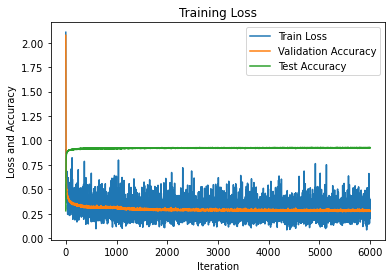

In [14]:
plt.plot(train_loss)
plt.plot(val_loss)
plt.plot(test_acc)
plt.legend(["Train Loss","Validation Accuracy","Test Accuracy"])
plt.xlabel("Iteration")
plt.ylabel("Loss and Accuracy")
plt.title("Training Loss")

In [15]:
correct = 0
total = 0

mpred=[]
mlabel=[]
with torch.no_grad():
    for images, labels in test_load:
        images = Variable(images.view(-1, 28*28*3))
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        mlabel.append(labels.numpy())
        mpred.append(predicted.numpy())
        total += labels.size(0)
        correct += (predicted == labels).sum()

print('Accuracy of the model on 10000 test datas : %.2f %%' % (100 * correct / total))

Accuracy of the model on 10000 test datas : 92.67 %
